In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

import joblib


In [2]:
data= pd.read_csv(r"C:\Users\A Prem kumar\Desktop\cover_type (1).csv")

In [3]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,Aspen,1,29
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen,1,29
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine,1,12
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine,1,30
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen,1,29


In [4]:
data.shape

(145890, 13)

In [5]:
data["Wilderness_Area"].value_counts()

Wilderness_Area
1    134367
3      6349
4      4675
2       499
Name: count, dtype: int64

In [6]:
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Cover_Type                            0
Wilderness_Area                       0
Soil_Type                             0
dtype: int64

In [7]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type
count,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000
mean,2874.458949,141.127418,11.925574,251.824738,34.554322,3313.827541,217.368106,224.874748,139.788203,3044.958105,1.186593,23.364905
std,210.801279,107.719296,6.319326,192.473899,41.215776,1687.779953,21.590298,16.084851,31.311690,1761.882341,0.656571,8.215184
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,1.000000,1.000000
25%,2747.000000,54.000000,7.000000,95.000000,7.000000,1848.000000,207.000000,216.000000,121.000000,1608.000000,1.000000,12.000000
50%,2909.000000,108.000000,11.000000,212.000000,23.000000,3420.000000,222.000000,226.000000,140.000000,2713.000000,1.000000,29.000000
75%,3004.000000,217.000000,15.000000,362.000000,51.000000,4673.000000,232.000000,236.000000,159.000000,4478.000000,1.000000,29.000000
max,3849.000000,360.000000,61.000000,1343.000000,554.000000,7117.000000,254.000000,254.000000,248.000000,7173.000000,4.000000,40.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           145890 non-null  int64 
 1   Aspect                              145890 non-null  int64 
 2   Slope                               145890 non-null  int64 
 3   Horizontal_Distance_To_Hydrology    145890 non-null  int64 
 4   Vertical_Distance_To_Hydrology      145890 non-null  int64 
 5   Horizontal_Distance_To_Roadways     145890 non-null  int64 
 6   Hillshade_9am                       145890 non-null  int64 
 7   Hillshade_Noon                      145890 non-null  int64 
 8   Hillshade_3pm                       145890 non-null  int64 
 9   Horizontal_Distance_To_Fire_Points  145890 non-null  int64 
 10  Cover_Type                          145890 non-null  object
 11  Wilderness_Area                     145

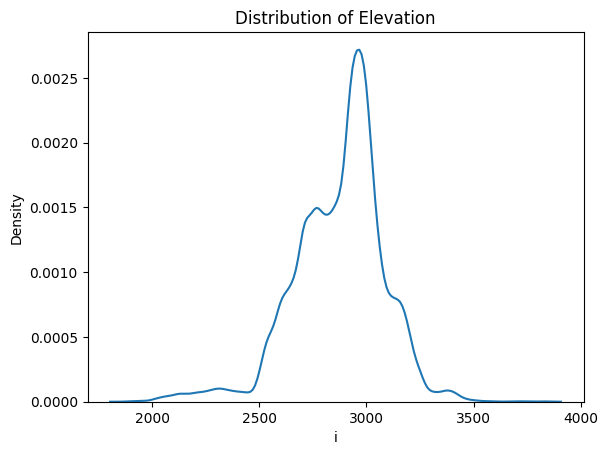

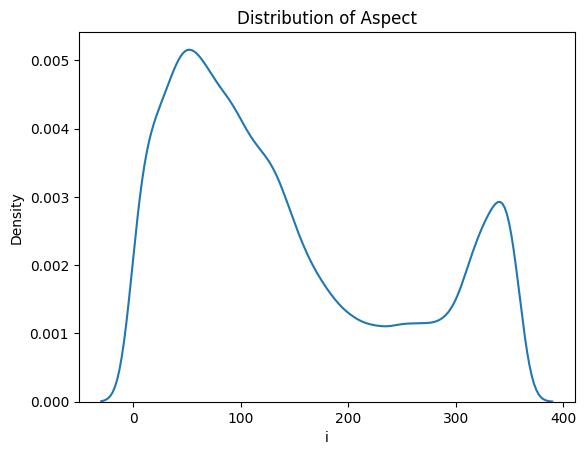

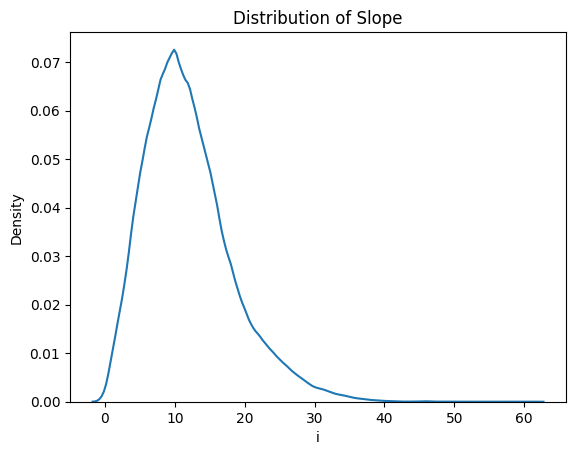

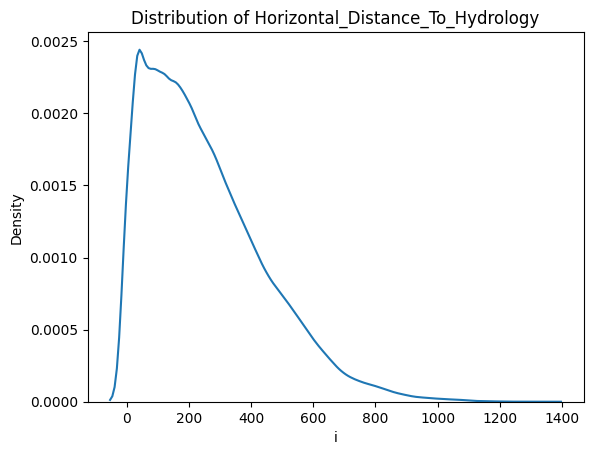

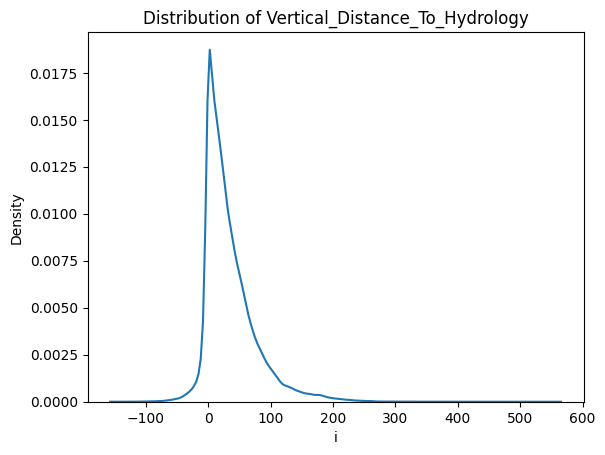

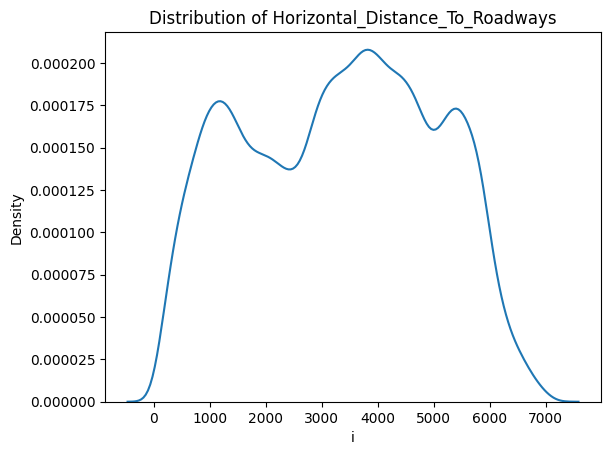

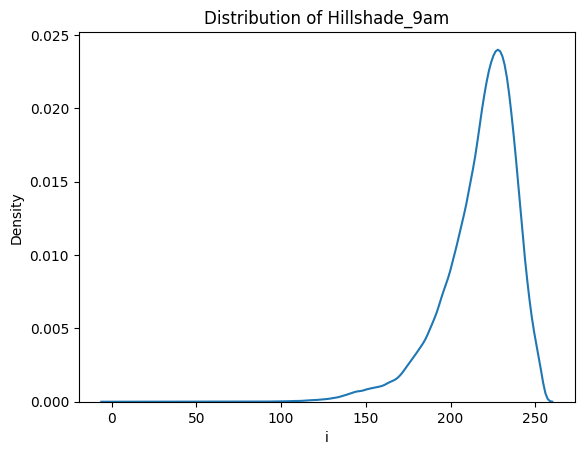

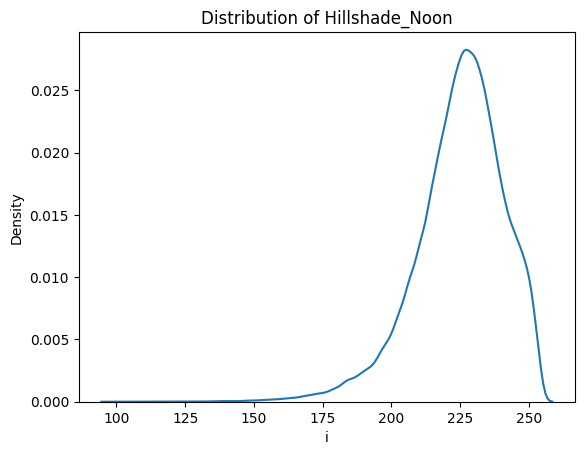

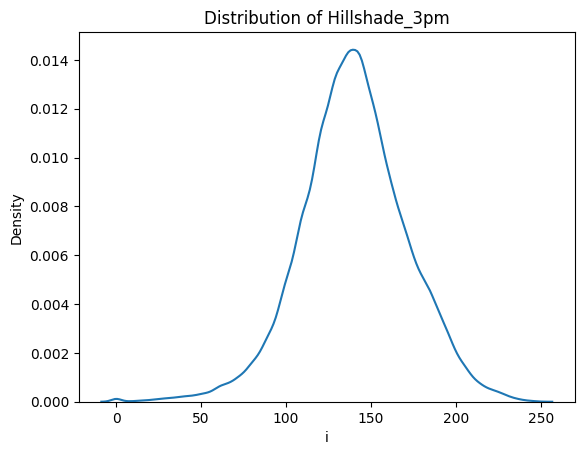

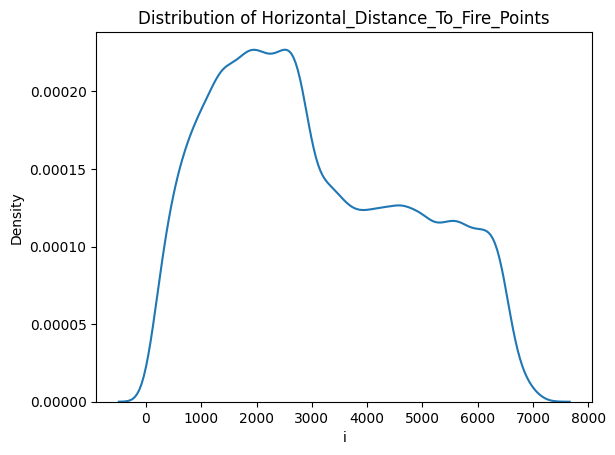

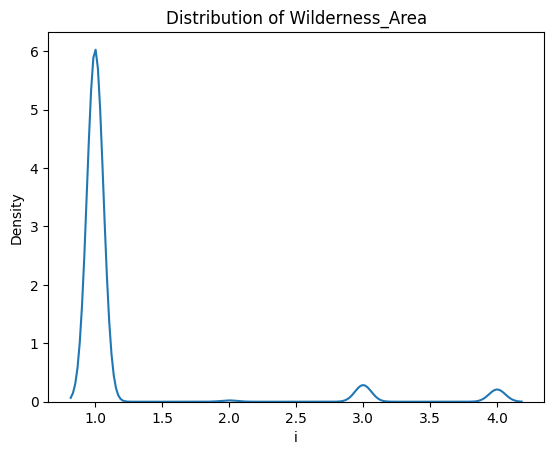

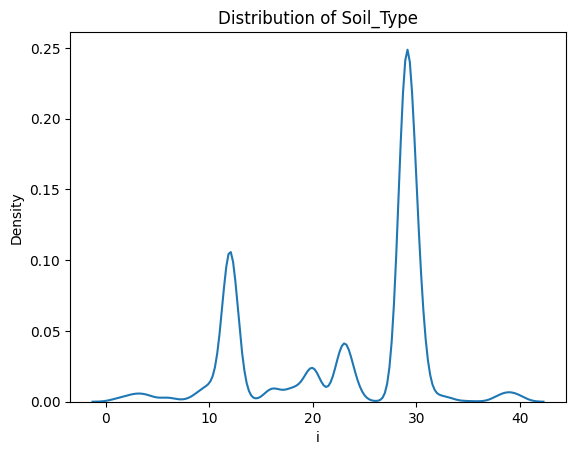

In [9]:
numeric_cols= data.select_dtypes(include="int64").columns

for i in numeric_cols:
    plt.figure()
    sns.kdeplot(data[i])
    plt.title(f"Distribution of {i}")
    plt.xlabel("i")
    plt.ylabel("Density")
    plt.show()

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
X = data.drop("Cover_Type", axis=1)
y = data["Cover_Type"]

imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

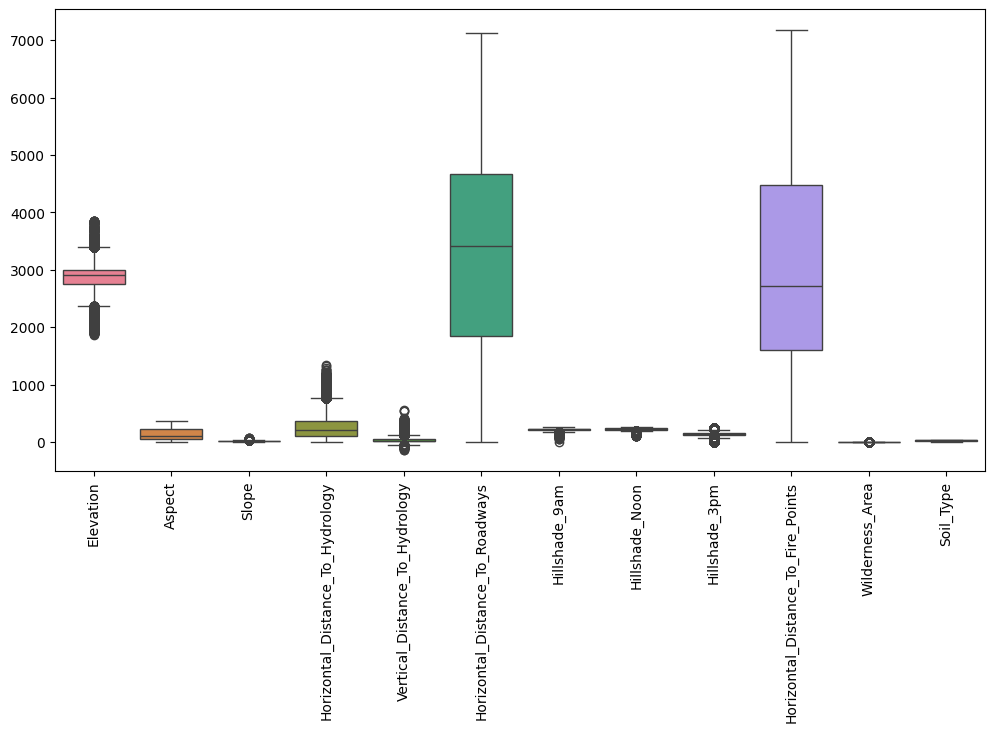

In [12]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90) 
sns.boxplot(X_imputed)         
plt.show()

In [13]:
X_imputed["Wilderness_Area"].value_counts()

Wilderness_Area
1.0    134367
3.0      6349
4.0      4675
2.0       499
Name: count, dtype: int64

In [14]:

def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
    return df

In [15]:
categorical_cols = ["Wilderness_Area", "Soil_Type"]


In [16]:
numeric_cols = [
    col for col in X_imputed.columns
    if col not in categorical_cols
]

In [17]:
numeric_cols

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

In [18]:
X_final = X_imputed.copy()

for col in numeric_cols:
    X_final = cap_outliers_iqr(X_final, col)

In [19]:
X_final["Wilderness_Area"].value_counts()


Wilderness_Area
1.0    134367
3.0      6349
4.0      4675
2.0       499
Name: count, dtype: int64

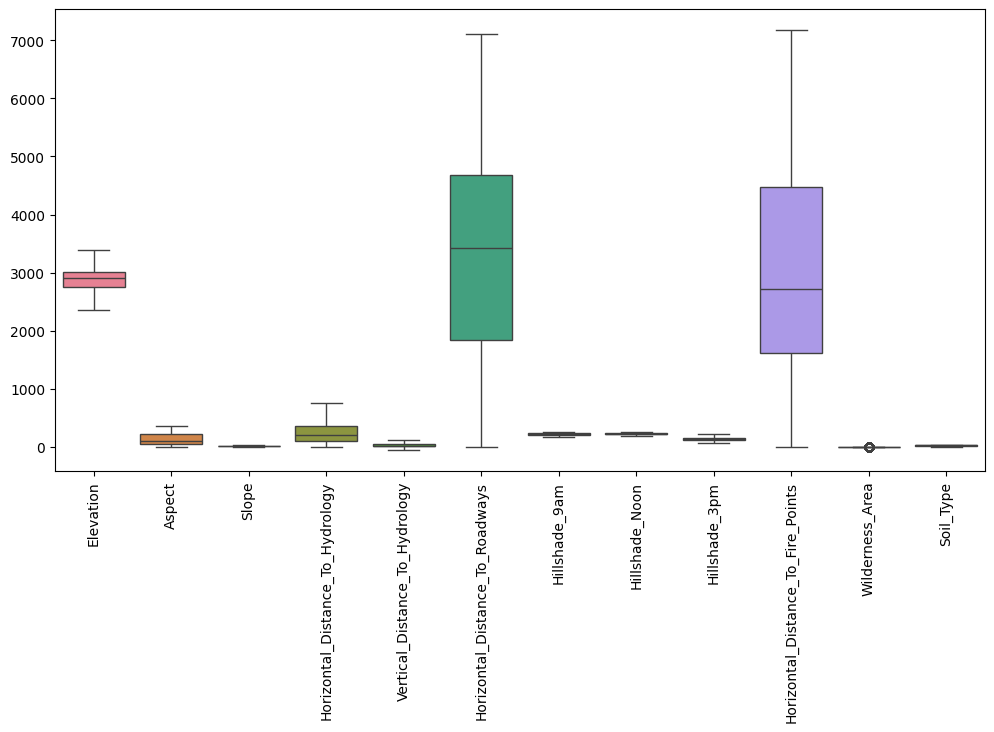

In [20]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90) 
sns.boxplot(X_final)         
plt.show()



In [21]:
X_final["Wilderness_Area"].value_counts()


Wilderness_Area
1.0    134367
3.0      6349
4.0      4675
2.0       499
Name: count, dtype: int64

In [22]:
X_final.skew()

Elevation                            -0.340370
Aspect                                0.689432
Slope                                 0.621361
Horizontal_Distance_To_Hydrology      0.792349
Vertical_Distance_To_Hydrology        0.861265
Horizontal_Distance_To_Roadways      -0.058240
Hillshade_9am                        -0.740409
Hillshade_Noon                       -0.505363
Hillshade_3pm                        -0.001189
Horizontal_Distance_To_Fire_Points    0.365249
Wilderness_Area                       3.423545
Soil_Type                            -0.692105
dtype: float64

In [23]:
X_final["Wilderness_Area"].value_counts()


Wilderness_Area
1.0    134367
3.0      6349
4.0      4675
2.0       499
Name: count, dtype: int64

In [24]:
X_final.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area                       0
Soil_Type                             0
dtype: int64

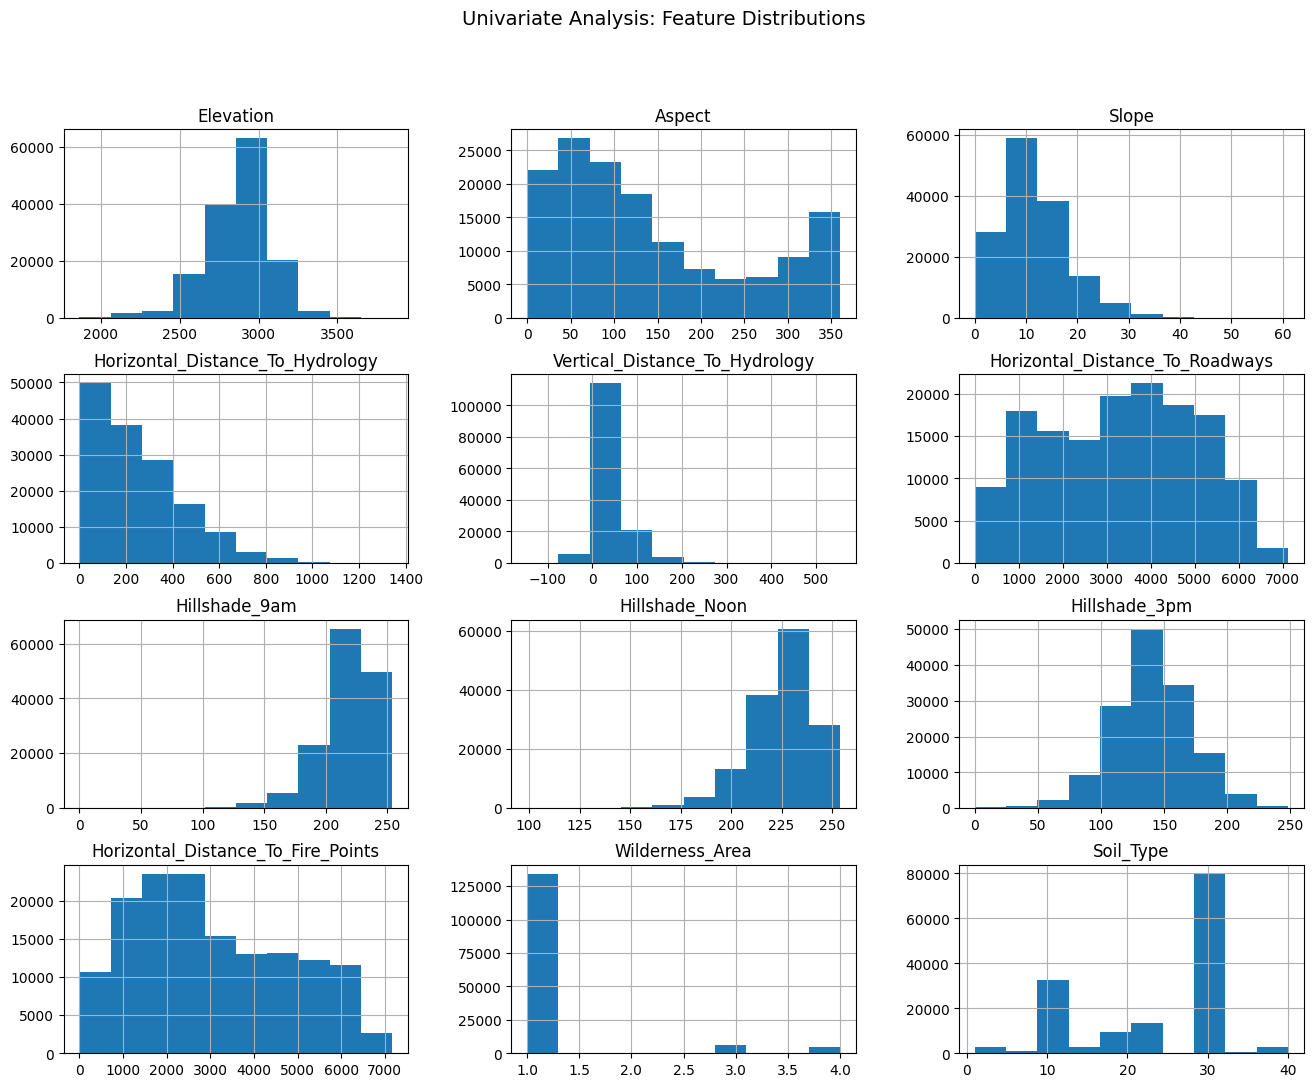

In [25]:
data.hist(figsize=(16,12))
plt.suptitle("Univariate Analysis: Feature Distributions", fontsize=14)
plt.show()

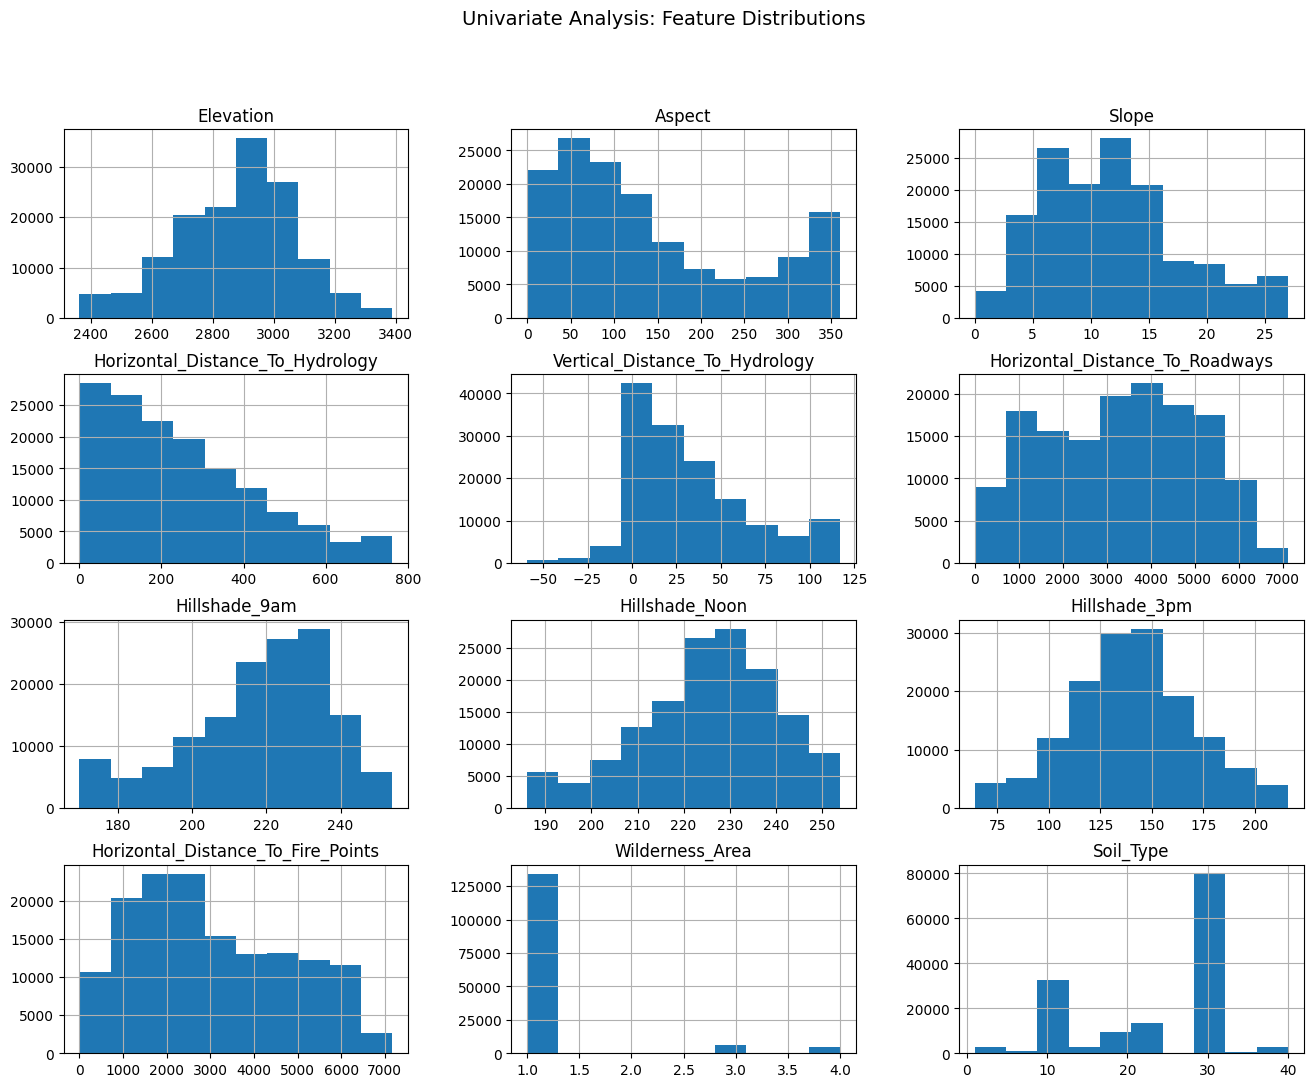

In [26]:
X_final.hist(figsize=(16,12))
plt.suptitle("Univariate Analysis: Feature Distributions", fontsize=14)
plt.show()

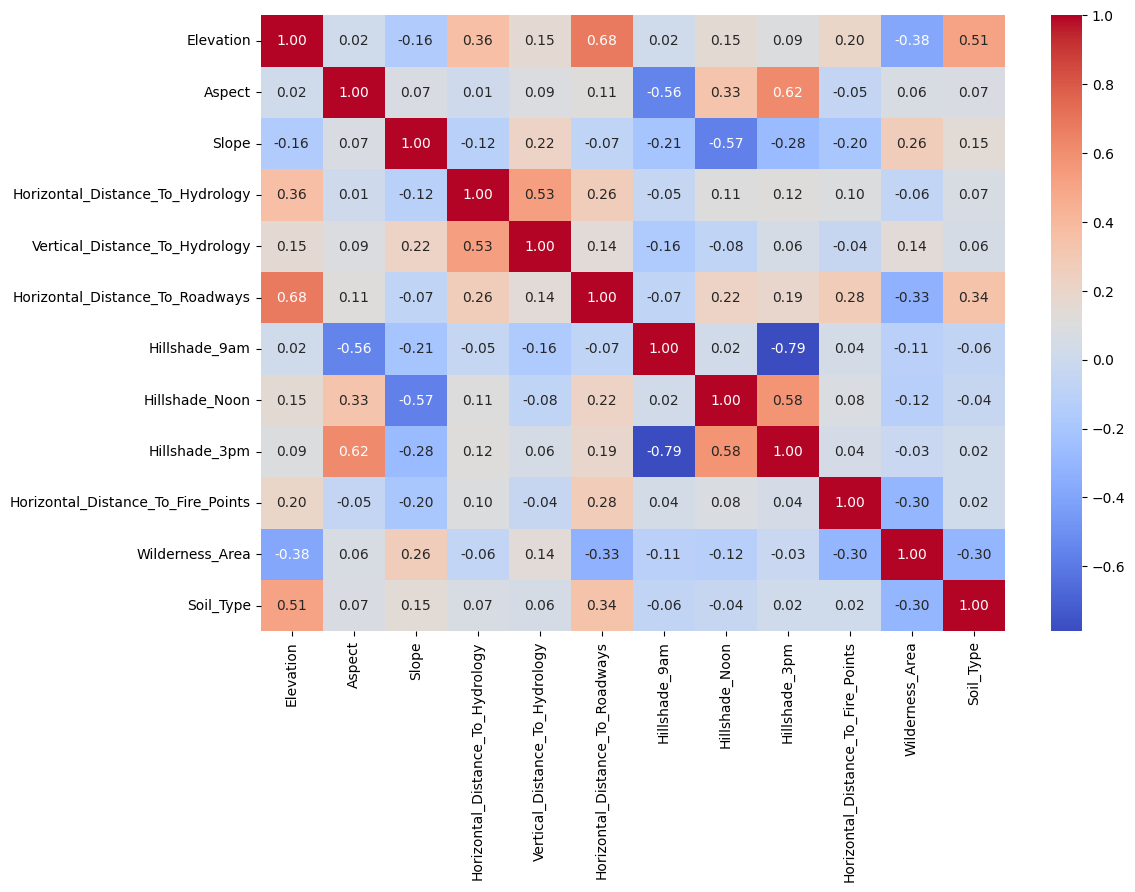

In [27]:
plt.figure(figsize=(12, 8))
corr = X.corr()
sns.heatmap(corr,cmap='coolwarm',fmt=".2f",annot=True)
plt.show()

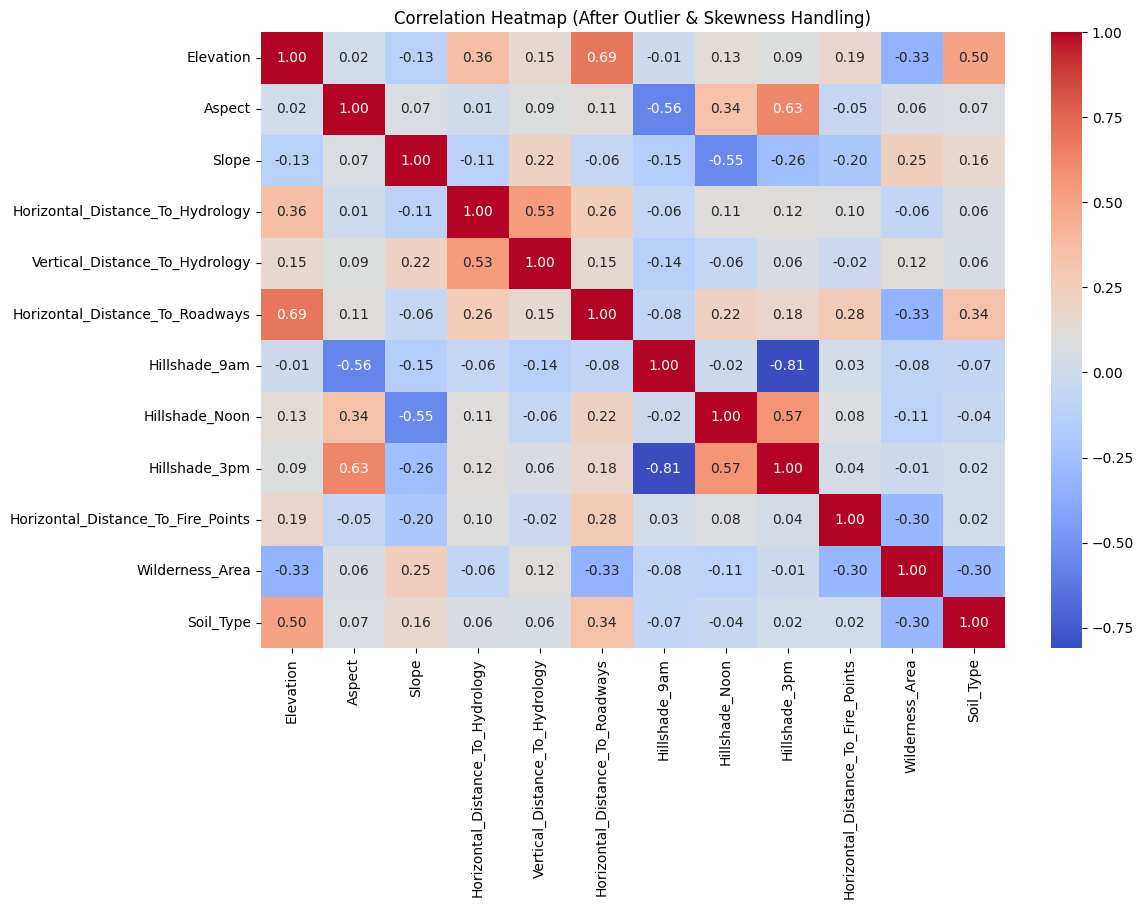

In [28]:
corr = X_final.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm',fmt=".2f",annot=True)
plt.title("Correlation Heatmap (After Outlier & Skewness Handling)")
plt.show()

In [29]:
X = X_final.copy()
y = data["Cover_Type"]

In [30]:
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,29.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,29.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,12.0
3,2785.0,155.0,18.0,242.0,117.0,3090.0,238.0,238.0,122.0,6211.0,1.0,30.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...
145885,2834.0,88.0,8.0,376.0,44.0,2552.0,232.0,227.0,128.0,1595.0,1.0,29.0
145886,2832.0,68.0,4.0,390.0,44.0,2522.0,224.0,231.0,142.0,1572.0,1.0,29.0
145887,2829.0,80.0,7.0,390.0,33.0,2492.0,229.0,228.0,133.0,1550.0,1.0,29.0
145888,2826.0,121.0,7.0,379.0,30.0,2462.0,232.0,234.0,135.0,1528.0,1.0,29.0


In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(np.unique(y_encoded))

[0 1 2 3 4 5 6]


In [39]:
y_encoded.min()

np.int64(0)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [33]:
y_encoded

array([0, 0, 4, ..., 4, 4, 4], shape=(145890,))

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

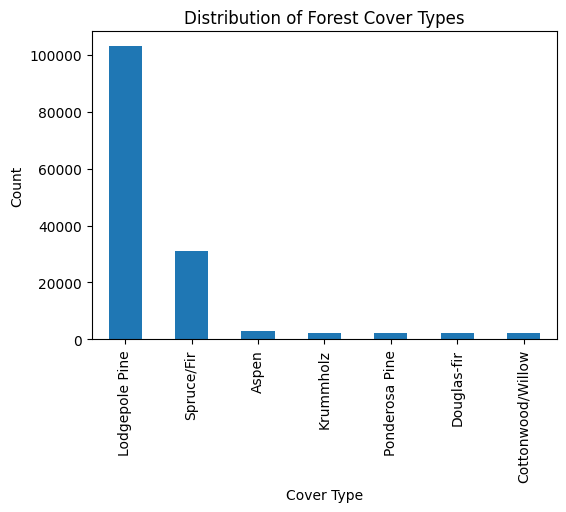

In [35]:
plt.figure(figsize=(6,4))
data['Cover_Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Forest Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train_scaled, y_train
)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE :", np.bincount(y_train_resampled))


Before SMOTE: [ 2455  1728  1728  1728 82457  1728 24888]
After SMOTE : [82457 82457 82457 82457 82457 82457 82457]


In [41]:
y_train_resampled

array([4, 5, 4, ..., 6, 6, 6], shape=(577199,))

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)

y_pred_lr = lr.predict(X_test_scaled)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)

y_pred_knn = knn.predict(X_test_scaled)

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

y_pred_dt = dt.predict(X_test_scaled)

In [ ]:

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_dt,
    cmap="Blues"
)
plt.title("Decision tree Confusion Matrix")
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf.predict(X_test_scaled)

In [49]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(name, y_test, y_pred):
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("KNN", y_test, y_pred_knn)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)


Logistic Regression
Accuracy: 0.6411337308931386
              precision    recall  f1-score   support

           0       0.12      0.73      0.21       614
           1       0.80      0.88      0.84       432
           2       0.59      0.62      0.61       432
           3       0.69      0.98      0.81       432
           4       0.87      0.63      0.73     20614
           5       0.63      0.58      0.60       432
           6       0.47      0.65      0.54      6222

    accuracy                           0.64     29178
   macro avg       0.60      0.72      0.62     29178
weighted avg       0.76      0.64      0.68     29178


KNN
Accuracy: 0.8880320789636027
              precision    recall  f1-score   support

           0       0.56      0.92      0.70       614
           1       0.88      0.86      0.87       432
           2       0.71      0.76      0.73       432
           3       0.84      0.98      0.90       432
           4       0.97      0.89      0.93     

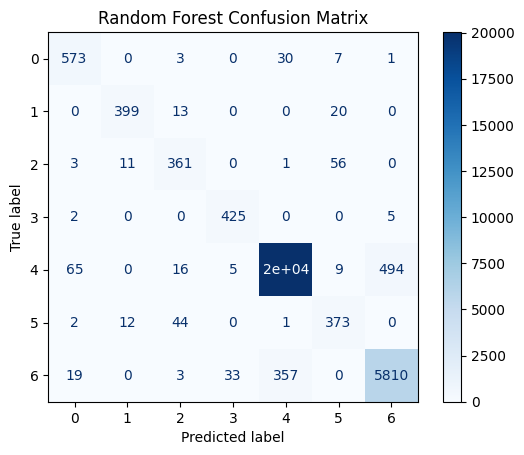

In [ ]:


ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf,
    cmap="Blues"
)
plt.title("Random Forest Confusion Matrix")
plt.show()

In [ ]:

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)

,Feature,Importance
0,Elevation,0.252330
11,Soil_Type,0.148674
5,Horizontal_Distance_To_Roadways,0.116604
10,Wilderness_Area,0.098612
9,Horizontal_Distance_To_Fire_Points,0.093141
3,Horizontal_Distance_To_Hydrology,0.066407
4,Vertical_Distance_To_Hydrology,0.046391
6,Hillshade_9am,0.044030
1,Aspect,0.039593
7,Hillshade_Noon,0.032839


In [58]:
!pip install xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(
    objective="multi:softmax",   
    num_class=7,
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",          
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from sklearn.metrics import accuracy_score
# Logistic Regression
lr_acc = accuracy_score(y_test, y_pred_lr)

# Decision Tree
dt_acc = accuracy_score(y_test, y_pred_dt)

# KNN
knn_acc = accuracy_score(y_test, y_pred_knn)

# Random Forest
rf_acc = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgb_acc = accuracy_score(y_test, y_pred_xgb)


In [60]:
comparison_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "KNN",
        "Random Forest",
        "XGBoost"
    ],
    "Accuracy": [
        lr_acc,
        dt_acc,
        knn_acc,
        rf_acc,
        xgb_acc
    ]
})

comparison_df.sort_values(by="Accuracy", ascending=False)


,Model,Accuracy
3,Random Forest,0.958462
4,XGBoost,0.947426
1,Decision Tree,0.933374
2,KNN,0.888032
0,Logistic Regression,0.641134


In [61]:
joblib.dump(rf, "random_forest.pkl")
joblib.dump(le, "label_encoder.pkl")
joblib.dump(list(X.columns), "features.pkl")


['features.pkl']

In [62]:
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

In [ ]:
joblib.dump(rf, "random_forest.pkl")



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
model = joblib.load("random_forest.pkl")
label_encoder = joblib.load("label_encoder.pkl")
selected_features = joblib.load("features.pkl")